In [69]:
# Preamble
from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

#### Load all the data

In [2]:
gz2_data = Table.read('../fits/full_sample_debiased_w_low_z.fits')

In [3]:
import pandas as pd

sparcfire_g = Table.read('../sparcfire_directories/g/g.galaxy_matched.fits')
sparcfire_g_arcs = pd.read_csv('../sparcfire_directories/g/g.galaxy_arcs.csv')

In [4]:
pitch_angles_galaxy = Table.read('../fits/sparcfire/pitch_angles_g.fits')
sparcfire_samples = Table.read('../fits/sparcfire/sparcfire_samples.fits')
g_ok = Table.read('g_vs_r/g_ok.fits')

In [53]:
L = np.load('../fits/sparcfire/np_metadata/L.npy')
P = np.load('../fits/sparcfire/np_metadata/P.npy')
P_absolute = np.absolute(P)
P_absolute[P == -999] = -999
L_f = (L.T/L[:,0]).T
L_f[L < 0] = -999
P_diff = (P_absolute.T - P_absolute[:,0]).T
P_diff[L < 0] = -999

In [6]:
# Look for spirals (Hart+17 method), which have been successfully reduced in sparcfire
spiral_sample = np.all([sparcfire_samples['in_sparcfire'],sparcfire_samples['axial_ok'],
                        sparcfire_samples['in_mass_limit'],sparcfire_samples['in_spiral'],
                        g_ok['ok']],axis=0)

print('{} spiral galaxies in total!'.format(spiral_sample.sum()))

2671 spiral galaxies in total!


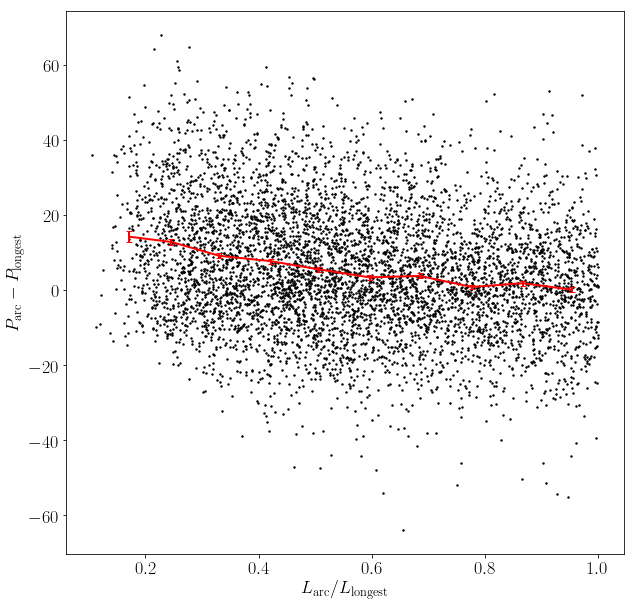

In [79]:
from xy_plots import x_vs_y
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

def exp(m,x,c):
    return np.exp(m*x) + c

bins = np.linspace(0,500,51)
arc_ok = L > 0
sub_arc_only = arc_ok.copy()
sub_arc_only[:,0] = False

x, y = L_f[sub_arc_only],P_diff[sub_arc_only]
xy = x_vs_y(x,y)
_ = xy.scatter(ax,color='k',s=2)
_ = xy.continuous_vs_continuous_binned(ax,color='r',lw=2,capsize=3)

ax.set_xlabel('$L_\mathrm{arc}/L_\mathrm{longest}$')
ax.set_ylabel('$P_\mathrm{arc}-P_\mathrm{longest}$')